# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# 1. Is the distribution of body temperatures normal?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [13]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [14]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


D:\PythonAnaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


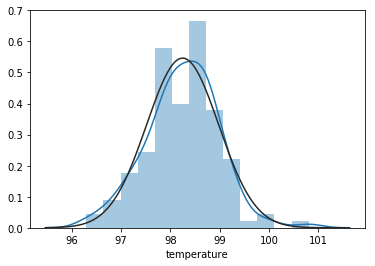

In [15]:
sns.distplot(df['temperature'], fit=norm)

In general, the plot above looks like a normal distribution. Let's use qq plot to verify its validation. 

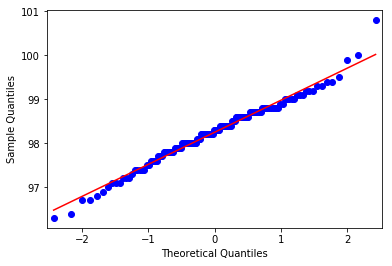

In [16]:
from statsmodels.graphics.gofplots import qqplot

qqplot_data = qqplot(df['temperature'], line='s').gca().lines

From qq plot we can see that excecpt one significant outlier, the other points all lie closely to the straight line. It tells us that body temperature follows normal distribution.

# 2. Is the sample size large? Are the observations independent?
#### The sample size is 130 which is greater than 30. So the sample size is large.
##### This is uncertain whether it is independent, because we don't know the if the people tested live together or have some genetic relationship.

# 3. Is the true population mean really 98.6 degrees F?
#### Since we are unsure about the independence, we should use one-sample test to make the hypothesis test.

In [17]:
import numpy as np
np.std(df['temperature']), np.mean(df['temperature'])

(0.7303577789050377, 98.24923076923078)

In [18]:
# Null Hypothesis: population mean is 98.6.
# Alternative Hypothesis: Population mean is not 98.6
alpha = 0.01
x_bar = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
z = (x_bar - 98.6)/(sigma/np.sqrt(len(df['temperature'])))
z

-5.475925202078116

#### Since z value is at the far left side, the p-value will be much smaller than alpha. Thus, we can reject H0 in favor of alternative hypothesis that the true population mean is not likely to be 98.6.

In [20]:
# One sample t-test
t = stats.ttest_1samp(df.temperature,98.6)[0]
p = stats.ttest_1samp(df.temperature,98.6)[1]

print('t-statistic:',t)
print('p-value:',p)

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


In [31]:
n = len(df.temperature)
n

130

In [33]:
print(stats.t.ppf(q=0.0005, df=n-1),stats.t.ppf(q=0.0005,df=n-1))

-3.3675464541818454 -3.3675464541818454


From the results, we can see t statistic is outside the t distribution corresponding to 99.9% confidence interval. The p-value is smaller than alpha = 0.01. Thus, we can reject null hypothesis.

In [35]:
# z test
# P-value:
p = stats.norm.cdf(z) * 2
z = -5.475925202078116
print('p-value: ',p)
print('z-statistic: ',z)

p-value:  4.3523151658821886e-08
z-statistic:  -5.475925202078116


Since p-value is very small, we can reject null hypothesis
In this case, the sample size is large enough. We can use z test to conduct hypothesis test.

# 4.Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [43]:
# Seed the random number generator
np.random.seed(16)

# Random sample size of 10
sample = np.random.choice(df.temperature, size=10)
sample

array([97.9, 98.9, 97.4, 97.2, 96.3, 98. , 98.4, 97.7, 98.2, 98.8])

In [44]:
# One sample t-test:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -2.913603090579074
p-value: 0.01721003197564439


In [45]:
# z-statistic:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -3.0712073213119178
p-value: 0.002131950624444718


In [39]:
# Quantiles of the t-distribution corresponding to confidence level (95%) and degrees of freedom:
print((stats.t.ppf(q=0.025, df=10-1)), (stats.t.ppf(q=0.975, df=10-1)))

# Quantiles of the t-distribution corresponding to confidence level (99.9%) and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=10-1)), (stats.t.ppf(q=0.9995, df=10-1)))

-2.262157162740992 2.2621571627409915
-4.780912585933472 4.7809125859335495


Both z test and t test can reject the null hypothesis with a 95% CI.

We should use t test in the case of sample size is equal to 10. Because it's less than 30.

We can reject H0 with a 99% confidence level by z test, but fail to reject by t test. This means z test can have a more accurate prediction on the hypothesis test.


# 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [46]:
# 95% prediction interval: Method 1
PI = stats.norm.interval(0.95, loc=x_bar, scale=std)
print('95% Prediction Interval:', PI)

95% Prediction Interval: (96.81221818540311, 99.68624335305844)


In [47]:
# Critical value at 95% confidence:
z_critical = norm.ppf(0.975)


# Margin of error:
moe = z_critical * std
print('Margin of Error:', moe)

# 95% prediction interval:
PI = np.array([x_bar - moe, x_bar + moe])
print('95% Prediction Interval:', PI)

Margin of Error: 1.4370125838276713
95% Prediction Interval: [96.81221819 99.68624335]


Thus, the abnormal data are those outside of the range 96.82 to 99.68. Temperature below 96 degree is considered hypothermia and above 100 degree is fever.

# Is there a significant difference between males and females in normal temperature?
#### We can use two-sample t-test in this case because two means are compared
#### H0: There is significant difference between males and females in normal temperature.
#### Ha: There is no significant difference between males and females in normal temperature.

In [53]:
# Classify temperature by gender
male = df.temperature[df.gender == 'M']
female = df.temperature[df.gender == 'F']

# Sample sizes
n_male = len(male)
n_fe = len(female)

# Sample means
mean_mele = np.mean(male)
mean_female = np.mean(female)

In [54]:
n_male,n_fe

(65, 65)

In [56]:
# Results of a two sample t-test:
t = stats.ttest_ind(female, male)[0]
p = stats.ttest_ind(female, male)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 2.2854345381656103
p-value: 0.02393188312239561


In [57]:
# The quantiles of the t-distribution corresponding to confidence level and degrees of freedom:
print(stats.t.ppf(q=0.025,df=65-1),stats.t.ppf(q=0.975,df=65-1))

-1.9977296536259739 1.9977296536259734


The p-value is smaller than 0.05 and t-statistic is also out of the range of 95 confidence interval. Thus, we fail to reject Ho hypothesis that there is significant temperature difference between men and women. 

From the code above, we can draw a conclusion as follows:

#### 1. The distribution of body temperature is normal.
#### 2. The normal range of body temperature should be 96.82 to 99.68
#### 3. There is no significant difference between men's temperature and women's